In [157]:
#import Quandl rest Api to fetch the required data sets
import quandl as quandl

# import pandas for analysing and cleaning the data set
import pandas as pd

# adufuller function needed for testing the trend of the data if stationary or not
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# plotly or matplotlib for Visualisation 
import plotly.express as px
import matplotlib.pyplot as plt

# importing statsmodels to make use of the ARIMA function
import statsmodels.api as sm

# import auto_arima to predic the (p,d,q) values needed for ARIMA
from pmdarima import auto_arima



# Analysing and comparing the inflation Rate in United kingdom, France and  Germany

In [2]:
# api key 
quandl.ApiConfig.api_key='z6ZwigfNt1zvUWa7x75p'

In [123]:
# getting hold of the data set using the quandl restful api
data=quandl.get(['RATEINF/CPI_GBR','RATEINF/CPI_DEU','RATEINF/CPI_FRA'], start_date='2020-01-01')

In [127]:
# formating the data to meake it more readable 
data.rename(
    columns={
             "RATEINF/CPI_GBR - Value":'inflation_UK',
             "RATEINF/CPI_DEU - Value":'inflation_GER',
             "RATEINF/CPI_FRA - Value":'inflation_FRA'},
            inplace=True,
             )
# showing two rows of the data set 
data.head(2)

,inflation_UK,inflation_GER,inflation_FRA
Date,,,
2020-01-31,108.196,99.8,104.54
2020-02-29,108.639,100.1,104.53


In [129]:
# checking for null values and geting rid of them 
data.isna().values.any()
clean_data=data.dropna()

#### from the plot bellow it can be deduced that :
* The rate of inflation in the Uk is heigher than that of the France and Germany 
* Germany experiences the least inflation level always
* The rate of inflation in all 3 countries has a positive gradient i.e increases at every given year 

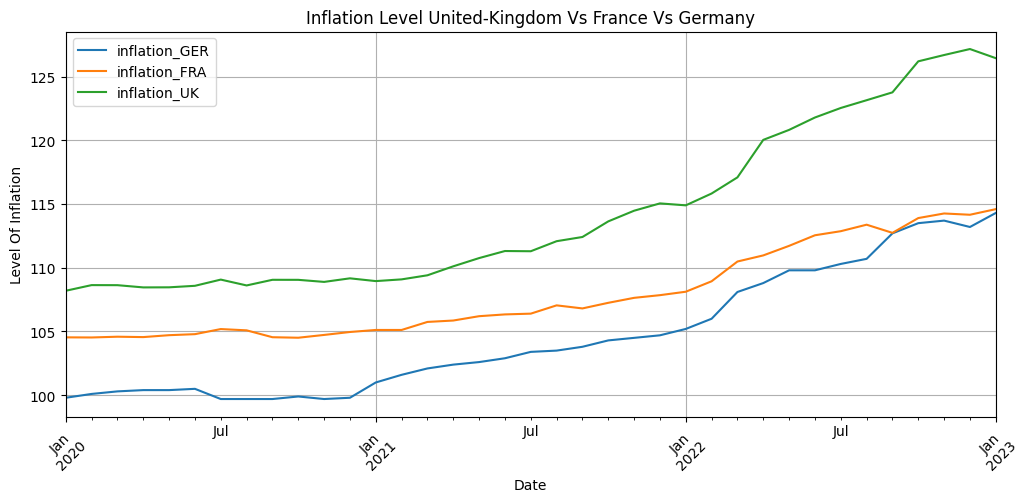

In [130]:

# visualising the data using matplotlib
plt.figure(figsize=[12, 5]); #
clean_data.inflation_GER.plot(legend = True)          # Germany inflation plot
clean_data.inflation_FRA.plot( legend = True)         # France inflation plot
clean_data.inflation_UK.plot( legend = True)         # United kingdom inflation plot

plt.title('Inflation Level United-Kingdom Vs France Vs Germany')
plt.ylabel('Level Of Inflation')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analysing and Visualising the energy consumption aroun the Globe

In [11]:
# getting hold of the Energy consumption Data for a single time stamp
energy_data = quandl.get(['BP/SOLAR_CAP_POL','BP/SOLAR_CAP_ARG','BP/GEO_CAP_HRV','BP/WIND_CAP_RUS','BP/SOLAR_CAP_MAR','BP/GEO_CAP_TASP', 'BP/GEO_CAP_TAFR','BP/GEO_CAP_EUR','BP/GEO_CAP_CESA','BP/GEO_CAP_NOAM'], collapse='annual' ,start_date='2020-12-31', end_date='2020-12-31')

In [12]:
# formating the data for readability 
energy_data.rename(
    columns={
    'BP/SOLAR_CAP_POL - Value':'Poland',
    'BP/SOLAR_CAP_ARG - Value':'Argentina',
    'BP/GEO_CAP_HRV - Value':'Croatia',
    'BP/WIND_CAP_RUS - Value':'Rusia',
    'BP/SOLAR_CAP_MAR - Value':'Moroco',
    'BP/GEO_CAP_TASP - Value':'Total pacific',
    'BP/GEO_CAP_TAFR - Value':'Total Africa',
    'BP/GEO_CAP_EUR - Value':'Europe',
    'BP/GEO_CAP_CESA - Value':'south&center America',
    'BP/GEO_CAP_NOAM - Value':'North america',
    },
    inplace=True
)
# displayin the data set
energy_data

,Poland,Argentina,Croatia,Rusia,Moroco,Total pacific,Total Africa,Europe,south&center America,North america
Date,,,,,,,,,,
2020-12-31,3954.963,764.135,10.0,945.3,194.0,5650.0,831.0,3265.0,762.0,3493.0


In [104]:

energy=energy_data.set_index(energy_data.index).transpose()
energy.columns

DatetimeIndex(['2020-12-31'], dtype='datetime64[ns]', name='Date', freq=None)

In [107]:
# bar plot of the data to visualise which country  Consumpes more Energy than the other 
fig=px.bar(energy, color=energy.index, title=' Comparison of Energy Consumption Around the Globe')
fig.update_layout(xaxis_title='Country/Continent',xaxis={'categoryorder':'total descending'},
yaxis_title='Energy Consumption',coloraxis_showscale=False),
fig.show()


# from the Visualisation (Bar chat), it can be noted thar:
* The Pacific Area Produces more Energy than any other Area on the Globe
* the pacific likewise onsupes energy than any other area of the Globe 
* croatia has the smalest amount of energy produced
* North America produces more energy than the South and Center Counterparts


# Analysis and prediction using the <code>ARIMA MODEL </code>
#### In this task i will analyse and predict the rate of inflation in the USA

In [134]:
# geting hold of the Us data
US_data=quandl.get('RATEINF/CPI_USA').dropna()


In [136]:
US_data.rename(columns={'Value':'Cpi USA'},
               inplace=True)
US_data.head(2)

,Cpi USA
Date,
1913-01-31,9.8
1913-02-28,9.8


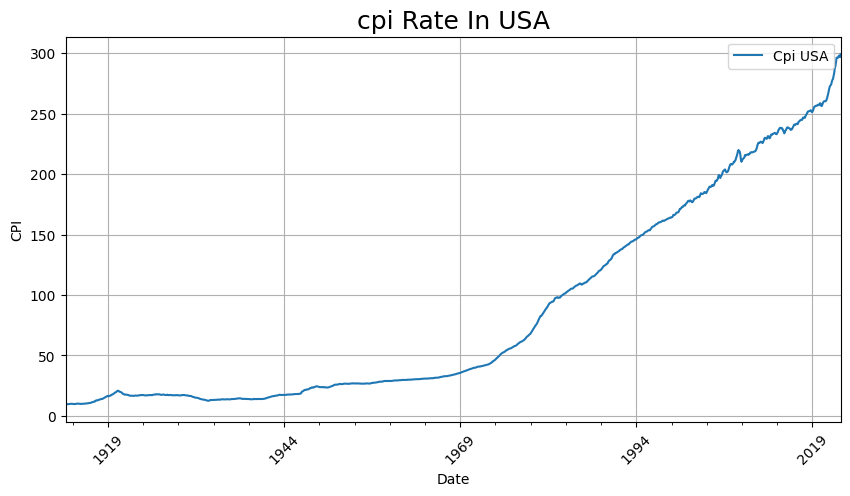

In [137]:
#Visualize net electricity generation from coal since 1973
# Set dimensions for figure
US_data.plot(figsize=(10,5),legend = True)
plt.title('cpi Rate In USA', fontsize=18)
plt.ylabel('CPI')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [140]:
# using the adfuller function to check if data is sattionary or not 
# this is based on the Pvalue returned from the function call
data_test=adfuller(US_data, autolag='AIC')
if data_test[1]>0.05:
    print('data is not stationary')
else:
    print('data is stationary')


data is not stationary


In [141]:
# converting the non stationary data set to a stationary dataset
st_data=US_data.diff()
st_data=st_data.dropna()


In [50]:
# run the auto_arima function to determin the ration of the "AR","I",and "MA" (p,d,q) parts of the ARIMA
arima_ratio=auto_arima(st_data, trace=True,suppress_warning=True,)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1190.788, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1567.357, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1550.026, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1512.561, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1565.380, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1191.740, Time=1.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1189.401, Time=1.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1228.599, Time=0.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1438.939, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1190.690, Time=1.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1384.935, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1192.881, Time=1.67 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1188.808, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1228.249, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [59]:
# split data set into training and testing sectionos 
train_data=st_data.iloc[:-50]    # train data set

test_data=st_data.iloc[-50:]    # test data set

In [172]:
# train the model based on the historical data
model= sm.tsa.arima.ARIMA(st_data,order=(2,1,1))
model=model.fit()

/home/nkdtech/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/home/nkdtech/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/home/nkdtech/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [173]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
# test if the model has a high accuracy by testing it with the test data set 
prediction=model.predict(start=start, end=end,).rename('ARIMA Prediction CPI  USA')

<Figure size 1600x800 with 0 Axes>

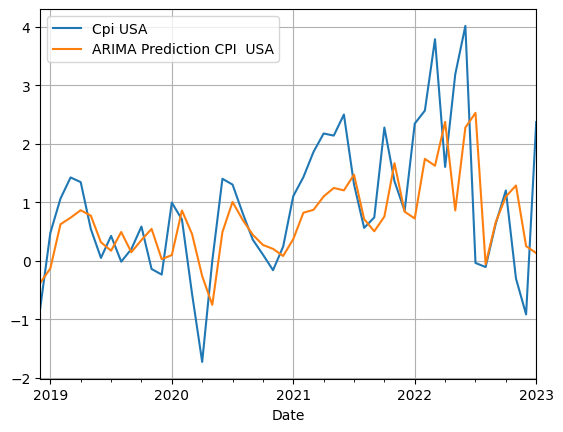

In [174]:
# visualise the test results
plt.figure(figsize=(16,8))
test_data.plot(legend=True)
prediction.plot(legend=True)
plt.grid(True)

# Analysis and prediction using the <code>SARIMA MODEL </code>
#### In this task i will analyse and predict the rate of inflation in the USA using the seasonal ARIMA model
* most of the methodes of analysis are thesame as that for <code>ARIMA</code> since the are the sme data set

In [151]:
# using the same data set as above 
data=US_data

<Figure size 1200x500 with 0 Axes>

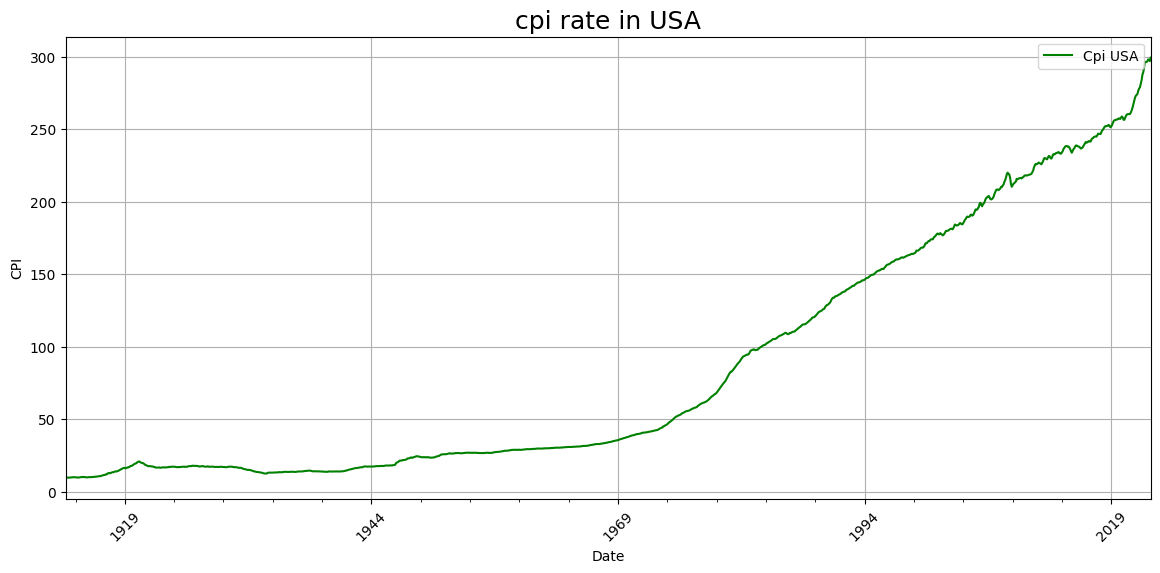

In [155]:
#Visualize the dataset 
plt.figure(figsize=[12, 5]); 
data.plot(figsize = (14, 6), legend = True, color='g')
plt.title('cpi rate in USA', fontsize=18)
plt.ylabel('CPI')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
#  check if data is stationary
data_test=adfuller(data, autolag='AIC')
if data_test[1]>0.05:
    print('data is not stationary')
else:
    print('data is stationary')


data is not stationary


In [30]:
# converting data to stationary data
st_data=US_data.diff()
st_data=st_data.dropna()


<Figure size 1200x500 with 0 Axes>

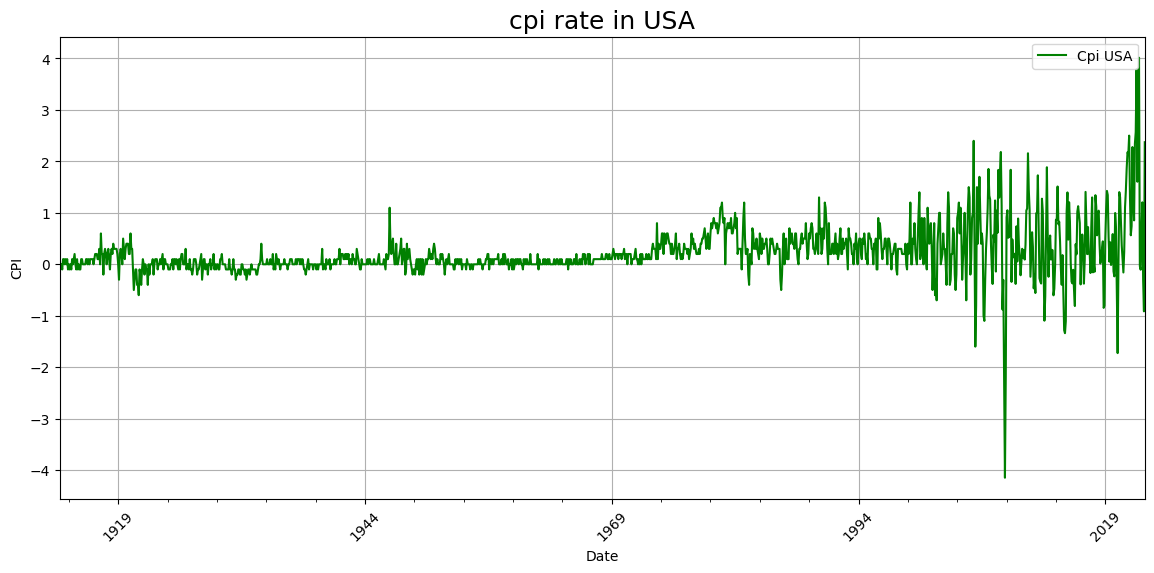

In [158]:
#Visualize the stationary data
plt.figure(figsize=[12, 5]);
st_data.plot(figsize = (14, 6), legend = True, color='g')
plt.title('cpi rate in USA' ,fontsize=18)
plt.ylabel('CPI')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### usingthe <code>Statsmodels</code> library to build auto-correlation (ACF) and partial auto-correlation plots from the stationary data set. 
* ACF describes how well the present value of the data is related to its past values 
* PACF finds a correlation of the residuals with the next lag value.
### <code> from the ACF and PACF graphs we can see that the data spikes after 12 months</code>


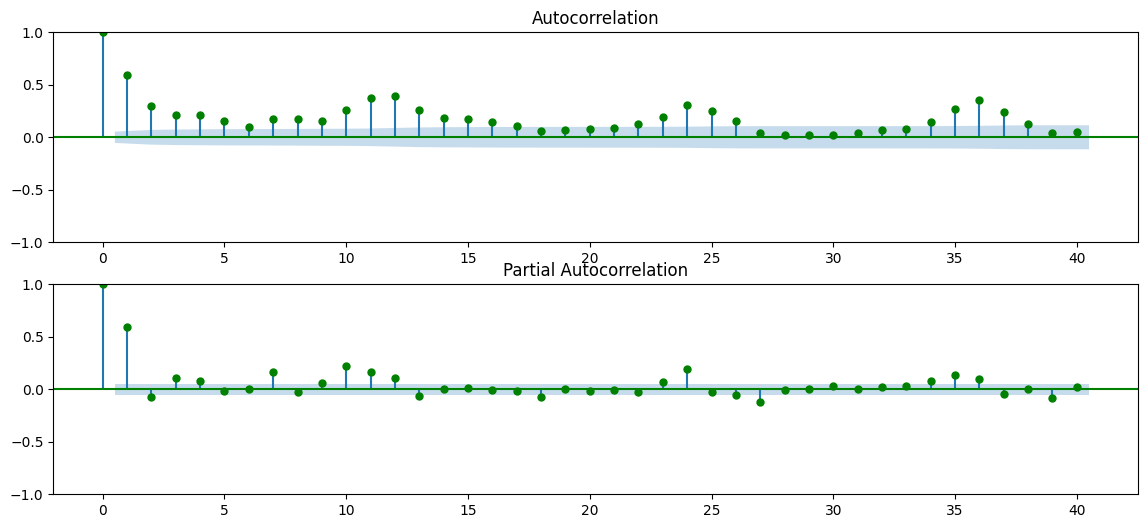

In [83]:
# plot the ACF and PACF graphs 
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(st_data,lags=40,ax=ax1,color='g')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(st_data,lags=40,ax=ax2, color='g')


In [55]:
# checking for stepwise to minimize aic 
stepwise=auto_arima(st_data, trace=True,suppress_warning=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=18.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1567.357, Time=0.36 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1478.495, Time=2.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1446.369, Time=3.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1565.380, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1512.561, Time=0.33 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1162.388, Time=12.93 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1415.027, Time=2.98 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1157.871, Time=30.72 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1347.960, Time=9.84 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=1166.303, Time=26.78 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1156.207, Time=43.83 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1414.531, Time=8.17 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1295.864, Time=12.39 sec
 ARIMA(1,1,1)(1,0,

In [159]:
# creating and training the seasonal model 
season_model=sm.tsa.arima.ARIMA(st_data,order=(1,1,2), seasonal_order=(1,0,1,12))
season_model=season_model.fit()
season_model.summary()


/home/nkdtech/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/home/nkdtech/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/home/nkdtech/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Cpi USA   No. Observations:                 1320
Model:             ARIMA(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -451.452
Date:                            Sat, 25 Feb 2023   AIC                            914.903
Time:                                    21:27:42   BIC                            946.011
Sample:                                02-28-1913   HQIC                           926.566
                                     - 01-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2035      0.028      7.290      0.000       0.149       0.258
ma.L1         -0.6352      0.028    -22.815      0.000      -0.690      -0.581
ma.L2         -0.3008      0.024    -12.520      0.000      -0.348      -0.254
ar.S.L12       0.9879      0.006    152.991      0.000       0.975       1.001
ma.S.L12      -0.8780      0.015    -57.854      0.000      -0.908      -0.848
sigma2         0.1147      0.002     64.249      0.000       0.111       0.118
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10277.56
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.99   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

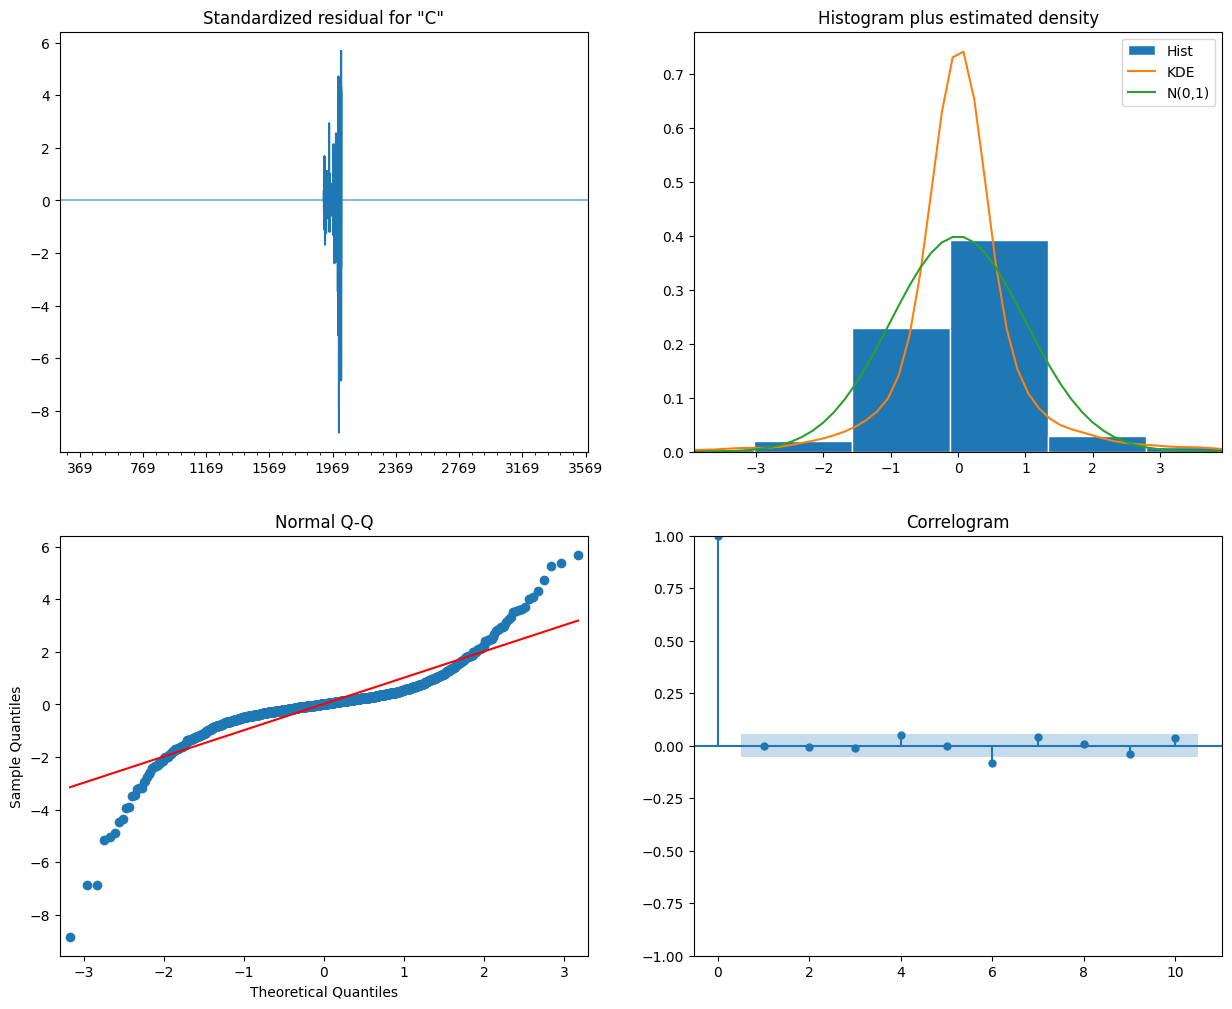

In [160]:
# verifying the validity of the model fit
season_model.plot_diagnostics(figsize=(15,12),);

<Figure size 1600x800 with 0 Axes>

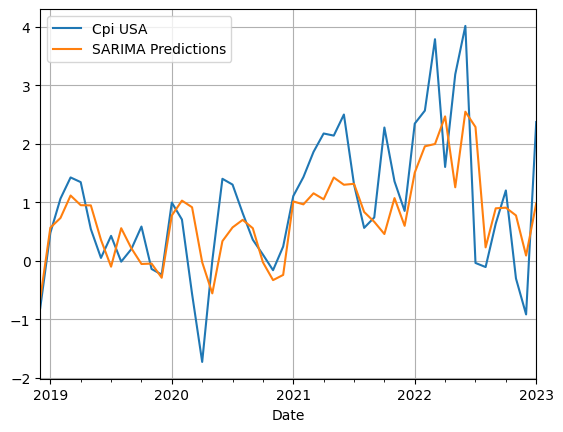

In [91]:

#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
training_data = st_data.iloc[:-50]
testing_data = st_data.iloc[-50:]
# test_data=st_data.iloc[-50:]
start=len(training_data)
end=len(training_data)+len(testing_data)-1
predictions = season_model.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

plt.figure(figsize=(16,8))
testing_data.plot(legend=True,)
predictions.plot(legend=True,)
plt.grid(True)

 the above models can be used to predict featuristic inflation rate in the us .